In [1]:

using DelimitedFiles
#using LightGraphs
using LinearAlgebra 
using PyPlot
using Random
#using BenchmarkTools
using Distributions
using StatsBase
using  OrdinaryDiffEq ###DifferentialEquations
using DiffEqCallbacks

In [2]:
N=100000;

In [3]:
xx=readdlm("2_async_to_phase_hoi_swarm_N=100000,j1=1,j2=5,k2=9");

In [4]:
k1=xx[:,1];

In [5]:
sp_fwd_final=xx[:,2]
sm_fwd_final=xx[:,3]
sp_bwd_final=xx[:,4]
sm_bwd_final=xx[:,5];

# Theoretical Curve

In [6]:
Δ=2
j1=1
j2=5
k2=9

9

In [7]:
sp_stable = zeros(size(k1)[1])    #Array{Complex{Float64},1}(undef, size(k1)[1])
sp_unstable =zeros(size(k1)[1]); ## Array{Complex{Float64},1}(undef, size(k1)[1]);

In [8]:
for l in 1:size(k1)[1]
    
  #  println(k1[l]);
    
    j21=(j2+k2)/2
    j11=(j1+k1[l])/2
    
    exp1=√Complex(((j21-j11) + √Complex((j21+j11)^2-8*Δ*j21))/(2*j21))
    exp2=√Complex(((j21-j11) - √Complex((j21+j11)^2-8*Δ*j21))/(2*j21))
    
    if isreal(exp1)

    exp1=exp1
    else
    exp1=NaN
    end
    
    if isreal(exp2)

    exp2=exp2
    else
    exp2=NaN
    end
    
    sp_stable[l]=exp1
    sp_unstable[l]=exp2
    
end;

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


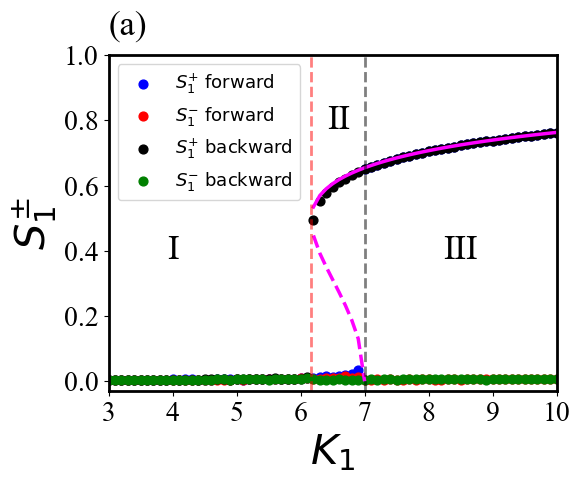

In [11]:

clf()
figsize=(9,6)
plot(k1,sp_stable,c="magenta",linewidth=2.5)
plot(k1,sp_unstable,c="magenta",linewidth=2.5,linestyle="--")
axvline(7,c="black",linestyle="--",alpha=0.5,linewidth=2.0)
axvline(2*(4√7-7)-1,c="red",linestyle="--",alpha=0.5,linewidth=2.0)
scatter(k1,sp_fwd_final,c="blue",s=40,label=L"$S_{1}^{+}$ forward")
scatter(k1,sm_fwd_final,c="red",s=40,label=L"$S_{1}^{-}$ forward")
scatter(k1,sp_bwd_final,c="black",s=40,label=L"$S_{1}^{+}$ backward")
scatter(k1,sm_bwd_final,c="green",s=40,label=L"$S_{1}^{-}$ backward")
xlabel(L"$K_1$",fontsize=30,fontname="Times New Roman")
ylabel(L"$S_{1}^{\pm}$",fontsize=30,fontname="Times New Roman")
ylim(-0.03,1)
xlim(3.0,10)
#title("N=$N,j1=$j1,k1,j2=$j2,k2=$k2")
#legend(["sp_fwd_final","", "sm_fwd_final","","sp_bwd_final","","sm_bwd_final"])


text(4, 0.4, "I", fontsize=25, fontname="Times New Roman", color="black", ha="center", va="center")
text(6.6, 0.8, "II", fontsize=25, fontname="Times New Roman", color="black", ha="center", va="center")
text(8.5, 0.4, "III", fontsize=25, fontname="Times New Roman", color="black", ha="center", va="center")

text(3.3, 1.09, "(a)", fontsize=25, fontname="Times New Roman", color="black", ha="center", va="center")

legend(loc="upper left",frameon=true, fontsize=13)
xticks(fontsize=20,fontname="Times New Roman")
yticks(fontsize=20,fontname="Times New Roman")
rc("axes",linewidth=2)
subplots_adjust(left=0.2,right=0.9,bottom=0.2,top=0.9)
#gcf()
savefig("./new_theoretical_numerical_N=$N,j1=$j1,j2=$j2,k2=$k2.png", dpi = 600, format = "png", transparent = false)
savefig("./new_theoretical_numerical_N=$N,j1=$j1,j2=$j2,k2=$k2.eps", dpi = 600, format = "eps", transparent = false)

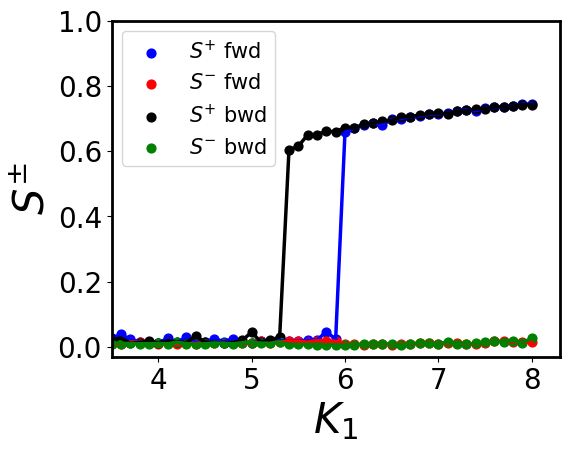

In [24]:

clf()
figsize=(9,6)
plot(k1,sp_fwd_final,c="blue",linewidth=2.5)
scatter(k1,sp_fwd_final,c="blue",s=40,label=L"$S^{+}$ fwd")
plot(k1,sm_fwd_final,c="red",linewidth=2.5)
scatter(k1,sm_fwd_final,c="red",s=40,label=L"$S^{-}$ fwd")
plot(k1,sp_bwd_final,c="black",linewidth=2.5)
scatter(k1,sp_bwd_final,c="black",s=40,label=L"$S^{+}$ bwd")
plot(k1,sm_bwd_final,c="green",linewidth=2.5)
scatter(k1,sm_bwd_final,c="green",s=40,label=L"$S^{-}$ bwd")
xlabel(L"$K_1$",fontsize=30)
ylabel(L"$S^{\pm}$",fontsize=30)
ylim(-0.03,1)
xlim(3.5,8.3)
#title("N=$N,j1=$j1,k1,j2=$j2,k2=$k2")
#legend(["sp_fwd_final","", "sm_fwd_final","","sp_bwd_final","","sm_bwd_final"])
legend(fontsize=15)
xticks(fontsize=20)
yticks(fontsize=20)
rc("axes",linewidth=2)
subplots_adjust(left=0.2,right=0.9,bottom=0.2,top=0.9)
#gcf()

savefig("./N=$N,j1=$j1,j2=$j2,k2=$k2.png", dpi = 600, format = "png", transparent = false)

In [2]:
wp=-3+3im

-3 + 3im

In [5]:
cos(angle(wp))

-0.7071067811865475